# Week07 : K-Nearest Neighbors, Multilayer Neural Network

---
p3

# 1. K-Nearest Neighbors using Scikit-learn

### Load Iris Dataset - binary classification

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

# use features 2 and 3 only
X = iris.data[50:150, [2,3]]
y = iris.target[50:150]

print('Class labels:', np.unique(y))

Class labels: [1 2]


### Splitting data into 70% training data & 30% test data

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1, stratify=y)

In [4]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [ 0 50 50]
Labels counts in y_train: [ 0 35 35]
Labels counts in y_test: [ 0 15 15]


---
p4

### Standardize the dataset

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Building a K-Nearest Neighbor Classifier

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric="minkowski")
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

---
p5

### Evaluation

In [7]:
# Train accuracy
acc = knn.score(X_train_std, y_train)
print("Train accuracy : %.4f" % acc)

Train accuracy : 0.9429


In [8]:
# Test accuracy
acc = knn.score(X_test_std, y_test)
print("Test accuracy : %.4f" % acc)

Test accuracy : 0.9667


---
p6

### Plotting decision boundary

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

ipykernel_launcher:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


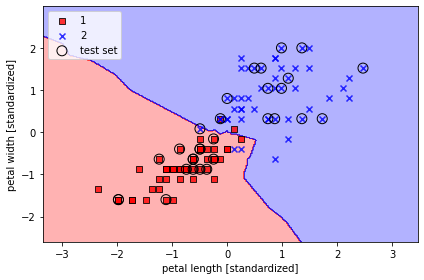

In [10]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(70, 100))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

---
p7

### Try other k values

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9, p=2, metric="minkowski")
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=9)

In [12]:
# Train accuracy
acc = knn.score(X_train_std, y_train)
print("Train accuracy : %.4f" % acc)

Train accuracy : 0.9286


In [13]:
# Test accuracy
acc = knn.score(X_test_std, y_test)
print("Test accuracy : %.4f" % acc)

Test accuracy : 0.9667


---
p8

ipykernel_launcher:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


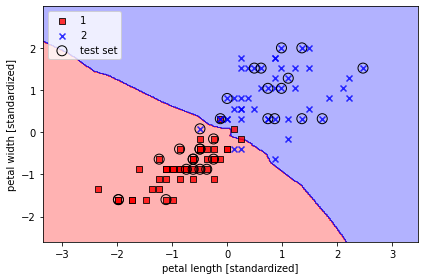

In [14]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(70, 100))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

# 2. Multi-layer Neural Networks using Scikit-learn

---
p18

### Load Iris Dataset - binary classification

In [15]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[50:150, [2,3]]
y = iris.target[50:150]

print('Class labels:', np.unique(y))

Class labels: [1 2]


### Splitting data into 70% training data & 30% test data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)

In [17]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [ 0 50 50]
Labels counts in y_train: [ 0 35 35]
Labels counts in y_test: [ 0 15 15]


---
p19

### Standardize the dataset

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Building a Multi-layer Neural Network and Training the model

In [19]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=100,alpha=1e-4,solver="sgd", verbose=1, tol=1e-4, random_state=0, learning_rate_init=0.1)
mlp.fit(X_train_std, y_train)

Iteration 1, loss = 0.71016458
Iteration 2, loss = 0.59771194
Iteration 3, loss = 0.50787981
Iteration 4, loss = 0.44944913
Iteration 5, loss = 0.41261814
Iteration 6, loss = 0.38456503
Iteration 7, loss = 0.35945002
Iteration 8, loss = 0.33476426
Iteration 9, loss = 0.30923804
Iteration 10, loss = 0.28353317
Iteration 11, loss = 0.25986126
Iteration 12, loss = 0.23951732
Iteration 13, loss = 0.22314582
Iteration 14, loss = 0.21011100
Iteration 15, loss = 0.19895346
Iteration 16, loss = 0.18893915
Iteration 17, loss = 0.17992167
Iteration 18, loss = 0.17190484
Iteration 19, loss = 0.16469415
Iteration 20, loss = 0.15828186
Iteration 21, loss = 0.15253475
Iteration 22, loss = 0.14740190
Iteration 23, loss = 0.14283431
Iteration 24, loss = 0.13871857
Iteration 25, loss = 0.13510085
Iteration 26, loss = 0.13189753
Iteration 27, loss = 0.12898641
Iteration 28, loss = 0.12635281
Iteration 29, loss = 0.12394738
Iteration 30, loss = 0.12172591
Iteration 31, loss = 0.11966868
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(10, 10), learning_rate_init=0.1, max_iter=100,
              random_state=0, solver='sgd', verbose=1)

---
p20

### Loss curve

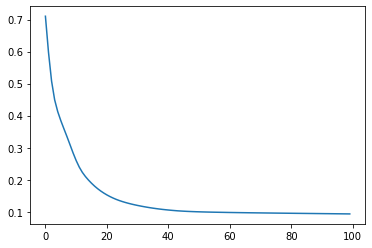

In [20]:
# plot the loss
plt.plot(mlp.loss_curve_)
plt.show()

### Evaluation

In [21]:
# Train accuracyacc = mlp.score(X_train_std, y_train)
acc = mlp.score(X_train_std, y_train)
print("Train accuracy : %.4f" % acc)

Train accuracy : 0.9429


In [22]:
# Test accuracy
acc = mlp.score(X_test_std, y_test)
print("Test accuracy : %.4f" % acc)

Test accuracy : 0.9667


---
p21

### Plotting decision boundary

ipykernel_launcher:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


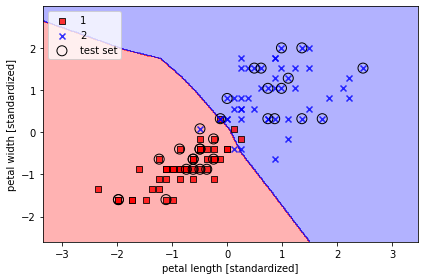

In [23]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

#mlp.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=mlp, test_idx=range(70, 100))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

---
p22

### Try other regularization parameters (alpha)

In [24]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=100, alpha=1, solver="sgd", verbose=0, tol=1e-6, random_state=0, learning_rate_init=0.1)
mlp.fit(X_train_std, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(alpha=1, hidden_layer_sizes=(10, 10), learning_rate_init=0.1,
              max_iter=100, random_state=0, solver='sgd', tol=1e-06, verbose=0)

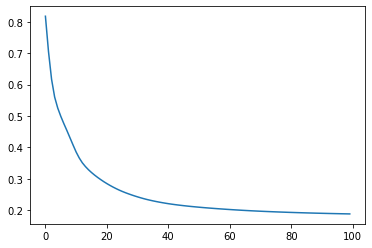

In [25]:
# plot the loss
plt.plot(mlp.loss_curve_)
plt.show()

---
p23

In [26]:
# Train accuracy
acc = mlp.score(X_train_std, y_train)
print("Train accuracy : %.4f" % acc)

Train accuracy : 0.9286


In [27]:
# Test accuracy
acc = mlp.score(X_test_std, y_test)
print("Test accuracy : %.4f" % acc)

Test accuracy : 0.9667


---
p24

ipykernel_launcher:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


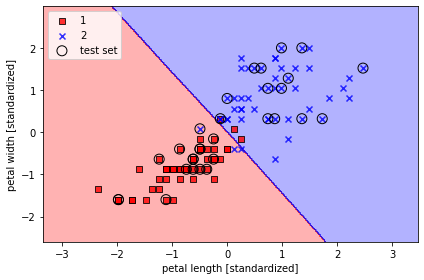

In [28]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=mlp, test_idx=range(70, 100))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

---
p27

# 3. Multi-layer Neural Networks - Image Classification

### Load MNIST Dataset

In [29]:
# from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
import numpy as np
from scipy import io

mnist = io.loadmat('mnist-original.mat')
mnist

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

### Get X and y

In [30]:
X, y = mnist['data'], mnist['label']
X = np.array(X).T
y = np.array(y).T.ravel()
X.shape

(70000, 784)

In [31]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [32]:
y[0]

0.0

---
p28

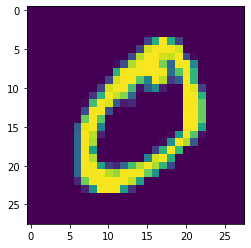

In [33]:
ex1 = X[0] 
ex1_image = ex1.reshape(28, 28) 
plt.imshow(ex1_image) 
plt.show()

### Splitting data into 60k training data & 10k test data

In [34]:
# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000],X[60000:] 
y_train, y_test = y[:60000],y[60000:]

---
p29

### Standardize the dataset

In [35]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [36]:
X_train_std[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00441808, -0.00575482, -0.00408252,
       -0.00408252,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00408252, -0.00470969, -0.00879935,
       -0.01159056, -0.01475898, -0.01928485, -0.0246718 , -0.02907103,
       -0.03059266, -0.03116401, -0.03196287, -0.03020254, -0.03131022,
       -0.0283834 , -0.02311919, -0.01916663, -0.0167723 , -0.01099636,
       -0.00832486, -0.00438069,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.00408252, -0.00539535,
       -0.00852241, -0.01198504, -0.01765348, -0.0277109 , -0.03702009,
       -0.05215128, -0.0670362 , -0.08301705, -0.0993793 , -0.11

---
p30

### Building a Multi-layer Neural Network and Training the model

In [75]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(25,25), max_iter=100, alpha=1e-4, solver="sgd",tol=1e-10, verbose=10, random_state=0, learning_rate_init=.1)
mlp.fit(X_train_std, y_train)

Iteration 1, loss = 0.33972295
Iteration 2, loss = 0.21520070
Iteration 3, loss = 0.22090728
Iteration 4, loss = 0.18324312
Iteration 5, loss = 0.18896668
Iteration 6, loss = 0.24463921
Iteration 7, loss = 0.19366088
Iteration 8, loss = 0.16396622
Iteration 9, loss = 0.14860199
Iteration 10, loss = 0.14644780
Iteration 11, loss = 0.13821241
Iteration 12, loss = 0.12561190
Iteration 13, loss = 0.12771074
Iteration 14, loss = 0.11483220
Iteration 15, loss = 0.10657914
Iteration 16, loss = 0.10410664
Iteration 17, loss = 0.10165662
Iteration 18, loss = 0.10485579
Iteration 19, loss = 0.11944956
Iteration 20, loss = 0.25925440
Iteration 21, loss = 0.17973982
Iteration 22, loss = 0.15605560
Iteration 23, loss = 0.13013519
Iteration 24, loss = 0.28486795
Iteration 25, loss = 0.36345488
Iteration 26, loss = 0.23742430
Iteration 27, loss = 0.18722980
Iteration 28, loss = 0.26686290
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(25, 25), learning_rate_init=0.1, max_iter=100,
              random_state=0, solver='sgd', tol=1e-10, verbose=10)

---
p31

### Loss curve

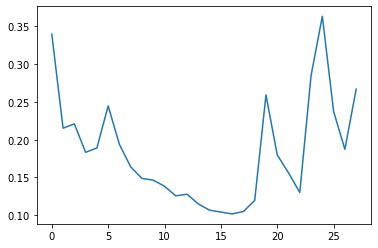

In [73]:
# plot the loss
plt.plot(mlp.loss_curve_)
plt.show()

### Evaluation

In [39]:
# Train accuracy
acc = mlp.score(X_train_std, y_train)
print("Train accuracy : %.4f" % acc)

Train accuracy : 0.9174


In [40]:
# Test accuracy
acc = mlp.score(X_test_std, y_test)
print("Test accuracy : %.4f" % acc)

Test accuracy : 0.9053


---
p32

### Classification example

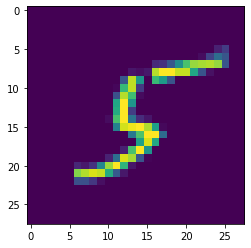

In [41]:
some_digit1 = X[35000]
some_digit_image1 = some_digit1.reshape(28, 28)
plt.imshow(some_digit_image1)
plt.show()

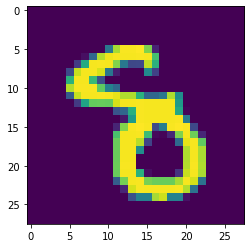

In [42]:
some_digit2 = X[50000]
some_digit_image2 = some_digit2.reshape(28, 28)
plt.imshow(some_digit_image2)
plt.show()

In [43]:
# classification
mlp.predict(sc.transform([some_digit1]))

array([5.])

In [44]:
# classification
mlp.predict(sc.transform([some_digit2]))

array([8.])

---
p33

### Visualization of MLP weights on MNIST

In [45]:
mlp.coefs_[0].shape

(784, 25)

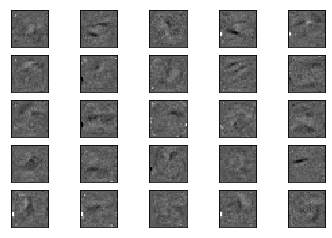

In [46]:
fig, axes = plt.subplots(5, 5)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

---
p34

In [47]:
mlp.coefs_[1].shape

(25, 25)

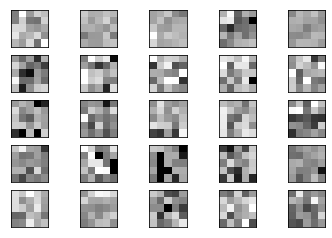

In [48]:
fig, axes = plt.subplots(5, 5)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[1].min(), mlp.coefs_[1].max()
for coef, ax in zip(mlp.coefs_[1].T, axes.ravel()):
    ax.matshow(coef.reshape(5, 5), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

---
p35

In [49]:
mlp.coefs_[2].shape

(25, 10)

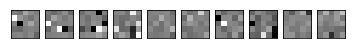

In [50]:
fig, axes = plt.subplots(1, 10)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[2].min(), mlp.coefs_[2].max()
for coef, ax in zip(mlp.coefs_[2].T, axes.ravel()):
    ax.matshow(coef.reshape(5, 5), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

---
p36

# Submit
- To make sure if you have completed this practice, Submit your practice file(Week07_givencode.ipynb) to e-class.
- **Deadline : tomorrow 11:59pm**
- Modify your ipynb file name as **“Week07_StudentNum_Name.ipynb”**
  - ```Ex) Week07_2020123456_홍길동.ipynb``` 
- You can upload this file without taking the quiz, but **homework is provided like a quiz every three weeks**, so it is recommended to take the quiz as well.

# Quiz 1
- Dataset : Iris dataset(use all features)
- Model : K-Nearest Neighbors
- Find the hyperparameter that makes highest test accuracy(0.9556) 
   - Number of Neighbors : 3, 5, 7, ...
   - distance metric : manhattan(p=1) / euclidean(p=2)

### Load Iris Dataset

In [51]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:]
y = iris.target[:]

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


### Splitting data into 70% training data & 30% test data

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)


In [53]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


### Standardize the dataset

In [54]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Building a K-Nearest Neighbor Classifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, p=2, metric="minkowski")
knn.fit(X_train_std, y_train)


KNeighborsClassifier(n_neighbors=3)

### Evaluation

In [56]:
# Train accuracy
acc = knn.score(X_train_std, y_train)
print("Train accuracy : %.4f" % acc)

Train accuracy : 0.9524


In [57]:
# Test accuracy
acc = knn.score(X_test_std, y_test)
print("Test accuracy : %.4f" % acc)

Test accuracy : 0.9556


# Quiz 2
- Dataset : MNIST dataset
- Model : Multi-layer Neural Network
- Find the hyperparameter that makes highest test accuracy 
   - Number of hidden layers
   - Regularization ratio

### Load MNIST Dataset

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import io

mnist = io.loadmat('mnist-original.mat')

In [59]:
X, y = mnist["data"], mnist["label"]
X = np.array(X).T
y = np.array(y).T.ravel()

In [60]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [61]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Try different structures
- Change the number of layers from 2 to 1 : **hidden_layer_sizes**=(25,)
- Compare with the above result(when the number of layer is 2)
  - train accuracy
  - test accuracy

In [62]:
# hidden_layer_size : (25, ) : 1 hidden layer with 25 units 
mlp = MLPClassifier(hidden_layer_sizes=(25,), max_iter=100, alpha=1e-4, solver="sgd", verbose=10, tol=1e-4, random_state=0, learning_rate_init=.1)

In [63]:
mlp.fit(X_train_std, y_train)

Iteration 1, loss = 0.32550724
Iteration 2, loss = 0.25387976
Iteration 3, loss = 0.21425934
Iteration 4, loss = 0.21336417
Iteration 5, loss = 0.24302243
Iteration 6, loss = 0.23050524
Iteration 7, loss = 0.22590711
Iteration 8, loss = 0.19137013
Iteration 9, loss = 0.16945813
Iteration 10, loss = 0.17350985
Iteration 11, loss = 0.20637201
Iteration 12, loss = 0.18842029
Iteration 13, loss = 0.13790448
Iteration 14, loss = 0.11600403
Iteration 15, loss = 0.10183288
Iteration 16, loss = 0.10758501
Iteration 17, loss = 0.12980714
Iteration 18, loss = 0.11736444
Iteration 19, loss = 0.09912650
Iteration 20, loss = 0.09809469
Iteration 21, loss = 0.10541522
Iteration 22, loss = 0.11116895
Iteration 23, loss = 0.13750142
Iteration 24, loss = 0.12998108
Iteration 25, loss = 0.10362235
Iteration 26, loss = 0.10212080
Iteration 27, loss = 0.09617589
Iteration 28, loss = 0.09817761
Iteration 29, loss = 0.10134635
Iteration 30, loss = 0.09388346
Iteration 31, loss = 0.09823194
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(25,), learning_rate_init=0.1, max_iter=100,
              random_state=0, solver='sgd', verbose=10)

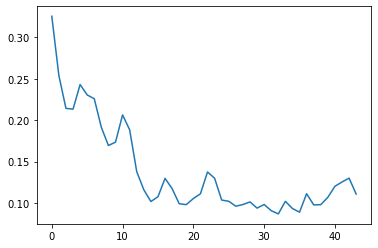

In [64]:
# plot the loss
plt.plot(mlp.loss_curve_)
plt.show()

### Evaluation 
- Train accuracy is lower than the above one.
- Test accuracy is higher than the above one.

In [65]:
mlp.score(X_train_std, y_train) # previous train acc with (25, 25), alpha=1e-4 : 1.0000

0.9816666666666667

In [66]:
mlp.score(X_test_std, y_test) # previous test acc with (25, 25), alpha=1e-4 : 0.9557

0.9509

### Try different regularization ratio
- Change the regularization term ratio : **alpha**=1  
  The larger the alpha value, the stronger the regularization is applied.
- compare with the above result(when alpha = 1e-4)
  - train accuracy
  - test accuracy

In [67]:
# L2 regularization ratio : alpha 
mlp2 = MLPClassifier(hidden_layer_sizes=(25,), max_iter=100, alpha=1, solver="sgd", verbose=10, tol=1e-4, random_state=0, learning_rate_init=.1)

In [68]:
mlp2.fit(X_train_std, y_train)

Iteration 1, loss = 0.49900023
Iteration 2, loss = 0.35956741
Iteration 3, loss = 0.33900586
Iteration 4, loss = 0.34179023
Iteration 5, loss = 0.35900346
Iteration 6, loss = 0.35612684
Iteration 7, loss = 0.34798746
Iteration 8, loss = 0.34582682
Iteration 9, loss = 0.33681977
Iteration 10, loss = 0.34980473
Iteration 11, loss = 0.34394740
Iteration 12, loss = 0.34131382
Iteration 13, loss = 0.35300368
Iteration 14, loss = 0.34166132
Iteration 15, loss = 0.34202775
Iteration 16, loss = 0.34332840
Iteration 17, loss = 0.33876818
Iteration 18, loss = 0.33050279
Iteration 19, loss = 0.35206837
Iteration 20, loss = 0.34308530
Iteration 21, loss = 0.33614989
Iteration 22, loss = 0.33029201
Iteration 23, loss = 0.33784790
Iteration 24, loss = 0.32489250
Iteration 25, loss = 0.34319853
Iteration 26, loss = 0.35867644
Iteration 27, loss = 0.34657212
Iteration 28, loss = 0.34286240
Iteration 29, loss = 0.34735691
Iteration 30, loss = 0.34792599
Iteration 31, loss = 0.34658047
Iteration 32, los

MLPClassifier(alpha=1, hidden_layer_sizes=(25,), learning_rate_init=0.1,
              max_iter=100, random_state=0, solver='sgd', verbose=10)

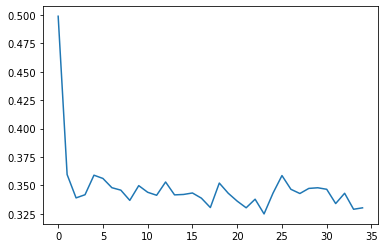

In [69]:
plt.plot(mlp2.loss_curve_)
plt.show()

### Evaluation 
- Train accuracy is lower than the above one.
- Test accuracy is higher than the above one.

In [159]:
mlp2.score(X_train_std, y_train) # previous train acc with (25, 25), alpha=1e-4 : 1.0000

0.9558

In [160]:
mlp2.score(X_test_std, y_test) # previous test acc with (25, 25), alpha=1e-4 : 0.9557

0.9534